# Part B: Q-learning algorithm


# Q1



In [25]:
import numpy as np
import matplotlib.pyplot as plt

 To complete Q-learning code for the environment described in Question 3 of Part A, which includes states {A, B, C, D} and actions {S, L}.

In [26]:
class QLearning:
    def __init__(self, num_states, num_actions, beta, epsilon, alpha, max_iterations):
        self.num_states = num_states
        self.num_actions = num_actions
        self.Q = np.zeros((num_states, num_actions))  # Initialize Q-table with zeros
        self.beta = beta  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.alpha = alpha  # Learning rate
        self.max_iterations = max_iterations

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)
        else:
            return np.argmax(self.Q[state, :])

    def update(self, state, action, reward, next_state):
        # Update Q-table using the Q-learning rule
        best_next_action = np.argmax(self.Q[next_state, :])
        self.Q[state, action] += self.alpha * (reward + self.beta * self.Q[next_state, best_next_action] - self.Q[state, action])

    def learn(self):
        # Learning process over iterations
        q_values_history = []
        for t in range(self.max_iterations):
            state = np.random.choice(self.num_states)  # Starting from a random state
            action = self.choose_action(state)  # Choose an action
            # Simulate the environment's response
            next_state, reward = self.simulate_environment(state, action)
            # Update Q-table
            self.update(state, action, reward, next_state)
            # Keep a history of Q-values for plotting
            q_values_history.append(np.copy(self.Q))
        
        return q_values_history

    def simulate_environment(self, state, action):
        # Placeholder for the environment's transition and reward dynamics
        # Here we simulate the next state and reward as per the given problem
        next_state = (state + 1) % self.num_states  # Circular transition
        reward = rewards[state, action]
        return next_state, reward




In [27]:
# Define the number of states and actions
num_states = 4
num_actions = 2

# Rewards matrix as given in the problem description
rewards = np.array([
    [2, 3],  # Rewards for actions L and S in state A
    [1, 2],  # Rewards for actions L and S in state B
    [3, 1],  # Rewards for actions L and S in state C
    [10, 0]  # Rewards for actions L and S in state D
])


In [28]:
# Initialize the Q-learning agent with given parameters
beta = 0.8  # Discount factor
epsilon = 0.3  # Epsilon for the epsilon-greedy policy
alpha = 0.1  # Learning rate
max_iterations = 10000  # Number of iterations

# Create the Q-learning agent
agent = QLearning(num_states, num_actions, beta, epsilon, alpha, max_iterations)

# Run the Q-learning algorithm
q_values_history = agent.learn()


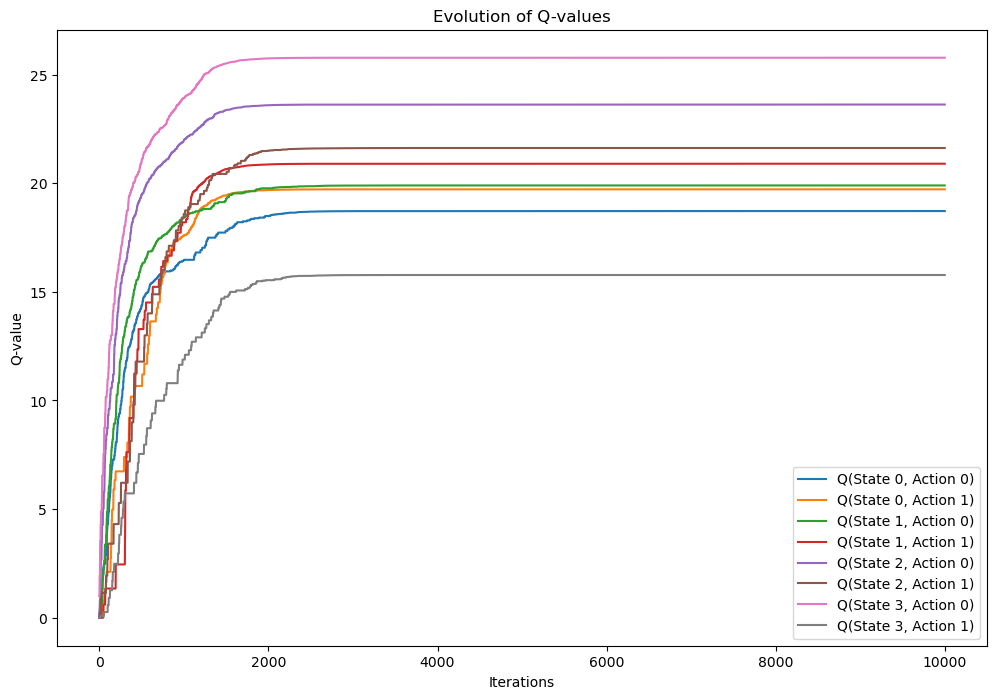

In [29]:
# Plot the evolution of Q-values
plt.figure(figsize=(12, 8))
for state in range(num_states):
    for action in range(num_actions):
        plt.plot([q[state, action] for q in q_values_history], label=f"Q(State {state}, Action {action})")
plt.xlabel('Iterations')
plt.ylabel('Q-value')
plt.title('Evolution of Q-values')
plt.legend()
plt.show()

# Q2

To modify the given code to show plots for discount parameters β=0.9 and β=0.5, we will have to run the ValueIteration and QLearn classes with these discount factors. Then, we will plot the "Trend of Learnt State Values over Iterations" and "Comparing the learnt state values" for both cases.

First, let's update the experiment information (exp_info) to reflect the different discount factors and run the value iteration and Q-learning algorithms. After that, we will generate the required plots. 

In [30]:
import copy
from tqdm import tqdm


import numpy as np
import matplotlib.pyplot as plt

# see their meaning on google

In [31]:
# value iteration algorithm
class ValueIteration():
    """
    Value Iteration
    - In the paper, the states are represented by 1-based indexing
    - In the code, we will be using 0-based indexing
    """

    def __init__(self, exp_info = {}):
        """Initialization method for the class"""

        # Defining the number of states & actions
        self.num_states  = 4
        self.num_actions = 2

        # Defining the rewards
        # The rewards are independent of the action
        self.rewards = np.array([-1, 0, 0, 1])

        # Defining the transition probabilities {p(s'|s, a)}
        temp = np.array([
            [0.5, 0, 0, 0.5],
            [0.5, 0.5, 0, 0],
            [0, 0.5, 0.5, 0],
            [0, 0, 0.5, 0.5]
        ])
        self.tran_probs = np.ones((2, 4, 4))
        self.tran_probs[0, :, :] = temp
        self.tran_probs[1, :, :] = temp.T

        # Defining a random generator
        self.rng = np.random.RandomState(exp_info.get("seed", 0))

        # Defining the experiment parameters
        self.delta     = exp_info.get("delta", 1e-2)
        self.max_iters = exp_info.get("max_iters", 100)
        self.discount  = exp_info.get("discount", 1)

        # Initializing the state values
        self.s_vals = np.zeros(self.num_states)

    def iterate(self):
        """Performs the iterations over the state space"""

        # Initializing some variables
        n = 0
        l_s_vals = []
        temp_delta = self.delta

        while temp_delta >= self.delta and n < self.max_iters:
            temp_delta = 0

            for s in range(self.num_states):
                max_val = 1e-5
                for a in range(self.num_actions):
                    # Calculating the value for a (S, A) pair
                    temp_val = 0
                    for s_prime in range(self.num_states):
                        temp_val += self.tran_probs[a, s, s_prime] * (
                            self.rewards[s] + self.discount * self.s_vals[s_prime]
                        )
                    max_val = max(max_val, temp_val)

                temp_delta = max(temp_delta, abs(max_val - self.s_vals[s]))
                self.s_vals[s] = max_val

            n += 1
            l_s_vals.append(copy.deepcopy(self.s_vals))

            ### DEBUG CODE
            # print(temp_delta, self.s_vals)

        return self.s_vals, np.array(l_s_vals)



In [32]:
class QLearn():
    """
    Q-Learning
    - In the paper, the states are represented by 1-based indexing
    - In the code, we will be using 0-based indexing
    """

    def __init__(self, exp_info = {}):
        """Initialization method for the class"""

        # Defining the number of states & actions
        self.num_states  = 4
        self.num_actions = 2

        # Defining the rewards
        # The rewards are independent of the action
        self.rewards = np.array([-1, 0, 0, 1])

        # Defining the transition probabilities {p(s'|s, a)}
        temp = np.array([
            [0.5, 0, 0, 0.5],
            [0.5, 0.5, 0, 0],
            [0, 0.5, 0.5, 0],
            [0, 0, 0.5, 0.5]
        ])
        self.tran_probs = np.ones((2, 4, 4))
        self.tran_probs[0, :, :] = temp
        self.tran_probs[1, :, :] = temp.T

        # Defining a random generator
        self.rng = np.random.RandomState(exp_info.get("seed", 0))

        # Initializing the action values and the state
        self.q_vals = np.zeros((self.num_states, self.num_actions))
        self.cur_state = 0

        # Defining the experiment parameters
        self.step_size    = exp_info.get("step_size", 0.1)
        self.discount     = exp_info.get("discount", 1)
        self.delta        = exp_info.get("delta", 1e-2)
        self.eps          = exp_info.get("epsilon", 0.1)
        self.max_iters    = exp_info.get("max_iters", 100)
        self.warmup_iters = exp_info.get("warmup_iters", 10)

    def _step(self):
        """
        Returns a tuple: (S, A, R, S')
        - We will choose the action using an epsilon-greedy policy derived from q
        """

        temp = self.rng.rand()

        # Exploratory action
        if temp <= self.eps:
            chosen_action = self.rng.choice(self.num_actions)

        # Exploitary action
        else:
            cur_pi = np.argmax(self.q_vals, axis = -1)
            chosen_action = cur_pi[self.cur_state]

        reward = self.rewards[self.cur_state]
        next_state = self.rng.choice(self.num_states, p = self.tran_probs[chosen_action, self.cur_state, :])
        prev_state = copy.copy(self.cur_state)
        self.cur_state = next_state

        return (prev_state, chosen_action, reward, next_state)


    def iterate(self):
        """Performs the iterations over the state space"""

        # Initialization of the required variables
        n = 0
        l_s_vals = []
        temp_delta = self.delta

        while n < self.max_iters and (n < self.warmup_iters or \
           (n >= self.warmup_iters and temp_delta >= self.delta)):

            # Taking a single step
            s, a, r, s_prime = self._step()

            # Computing the action value
            new_val = self.q_vals[s, a] + self.step_size * (
                self.rewards[s] + self.discount * np.max(self.q_vals[s_prime, :]) - \
                self.q_vals[s, a]
            )

            # Updating the delta, index and action value
            n += 1
            temp_delta = abs(new_val - self.q_vals[s, a])
            self.q_vals[s, a] = new_val

            if n % (self.max_iters // 100) == 0:
                s_vals = np.max(self.q_vals, axis = -1)
                l_s_vals.append(s_vals)


        return self.q_vals, np.array(l_s_vals), n

In [33]:
# Function to plot the trend of learned state values over iterations
def plot_s_vals_1(l_s_vals, title):
    num_iters = len(l_s_vals)
    num_states = len(l_s_vals[0])

    plt.figure(figsize=(10, 5))
    for s in range(num_states):
        plt.plot(range(num_iters), l_s_vals[:, s], label=f"State {s + 1}: {np.round(l_s_vals[-1, s], 3)}")
    plt.xticks(range(0, num_iters, num_iters // 10))
    plt.title(title)
    plt.xlabel("Iterations", labelpad=10)
    plt.ylabel("Learned State Value", labelpad=10)
    plt.legend(loc='upper left')
    plt.show()

In [34]:
# Function to compare learned state values
def plot_s_vals_2(ValIter_s_vals, QLearn_s_vals, title):
    num_states = len(ValIter_s_vals[0])

    plt.figure(figsize=(7, 4))
    plt.bar(range(num_states), ValIter_s_vals[-1], width=-0.15, color='gold',
            align='edge', label="Value Iteration")
    plt.bar(range(num_states), QLearn_s_vals[-1], width=0.15, color='darkorange',
            align='edge', label="Q-Learning")
    plt.xticks(range(num_states), range(1, num_states + 1))
    plt.title(title)
    plt.xlabel("States", labelpad=10)
    plt.ylabel("Learned State Values", labelpad=10)
    plt.legend()
    plt.show()


Running simulations for discount factor β = 0.9


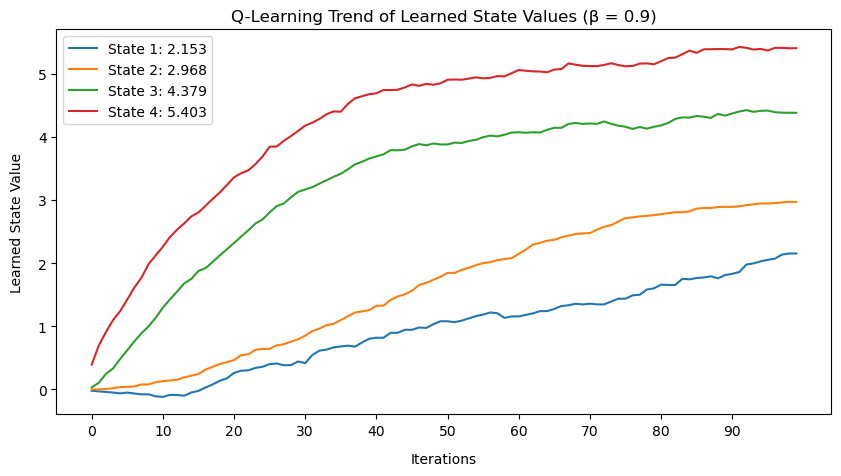

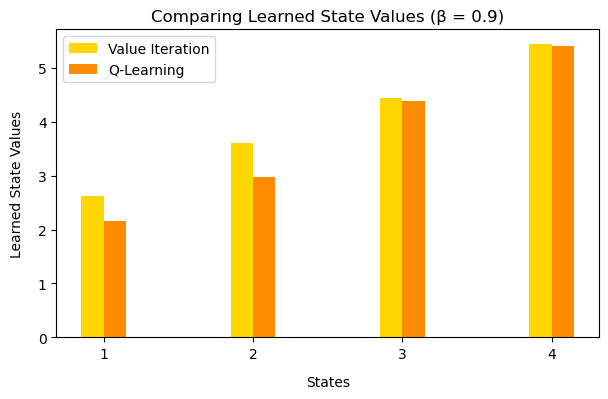


Running simulations for discount factor β = 0.5


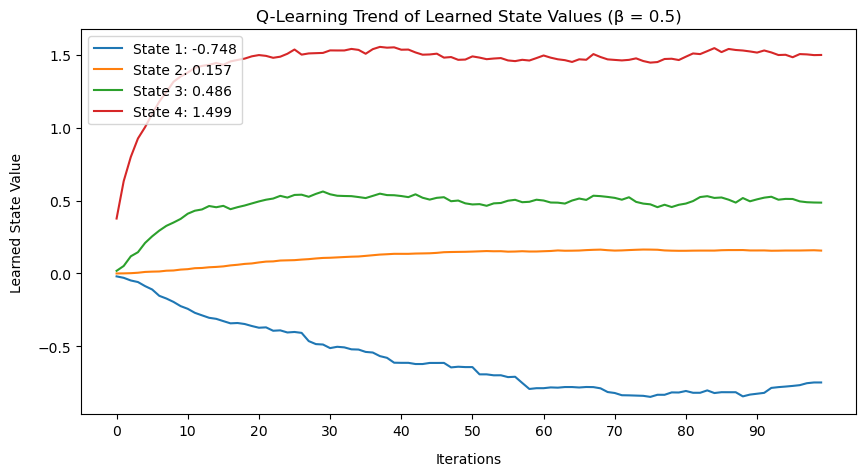

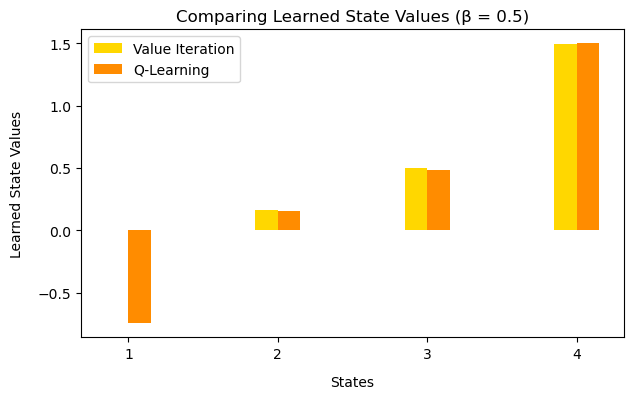

In [35]:
# Parameters for Q-learning
q_learning_params = {
    'delta': 1e-2,
    'max_iters': 10000,  # Reduced for practicality
    'epsilon': 0.2,
    'step_size': 0.01,
    'warmup_iters': 10000  # Reduced for practicality
}

# Discount factors to test
discount_factors = [0.9, 0.5]

# Loop over each discount factor
for discount in discount_factors:
    print(f"\nRunning simulations for discount factor β = {discount}")
    # Update experiment info for Value Iteration
    exp_info_vi = {
        'delta': 1e-2,
        'max_iters': 500,
        'discount': discount
    }

    # Value Iteration
    value_iter_env = ValueIteration(exp_info_vi)
    _, ValIter_s_vals = value_iter_env.iterate()

    # Q-Learning
    q_learning_params['discount'] = discount
    q_learn_env = QLearn(q_learning_params)
    _, QLearn_s_vals, _ = q_learn_env.iterate()

    # Plot the trend of learned state values
    plot_s_vals_1(QLearn_s_vals, f"Q-Learning Trend of Learned State Values (β = {discount})")

    # Plot comparing learned state values
    plot_s_vals_2(ValIter_s_vals, QLearn_s_vals, f"Comparing Learned State Values (β = {discount})")


Q-learning will converge to Q∗ if all state-action pairs are visited infinitely often, the learning rate α decreases appropriately over time (but not too quickly), and the policy used for action selection covers the entire action space sufficiently. The epsilon-greedy policy helps ensure that all actions are explored if ϵ is set appropriately.